#  DSP LAB Experiment 4
Author: P. Ramyashri <br>
Email: pramyshri.191ee138@gmail.com <br>
Roll: 191EE138 <br>
Date: 06/10/2021<br>

GITHUB LINK:https://github.com/ramyashri1887/DSP-LAB 

***

In [125]:
##imports
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

In [126]:
alpha=1+(138%3)
alpha

1

## Problem 1. (Computing DFT)


### Generate a unit amplitude sinusoidal signal of frequency 15α Hz for a duration of 2 seconds with a sampling rate of 120 samples/sec.

## Approach
Constructed 2 signals<br>
1) Sine wave which is real and odd: DFT will be imaginary and odd.<br>
2) Cos wave which is real and even: DFT will be real and even.<br>




In [127]:

f=15*alpha #15
w=2*np.pi*f
sr=120
t=np.arange(0,2,1/sr)

sine=np.sin(w*t)

cos=np.cos(w*t)

### 1. Plot magnitude of the DFT of the first 120 samples of the signal against frequency in Hertz

#### Method 1 DFT using FFT function()

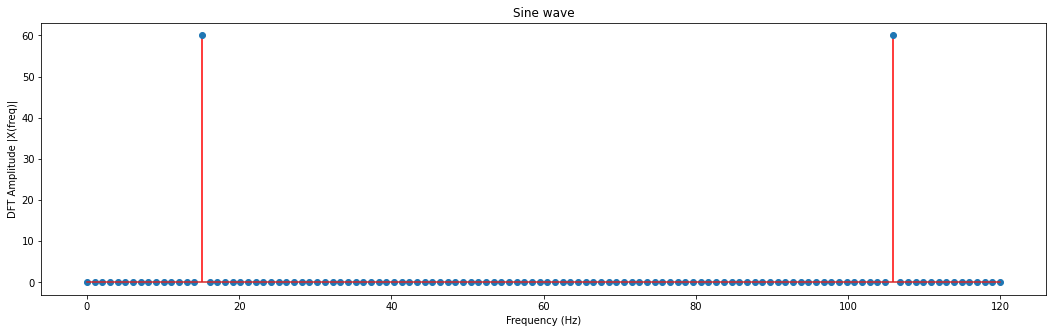

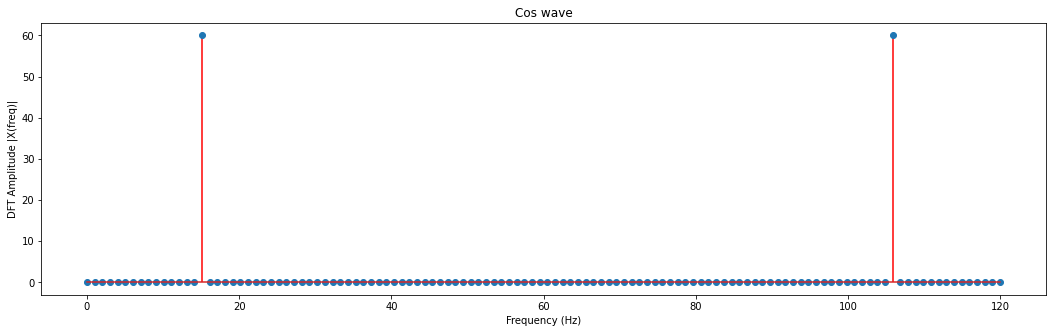

In [128]:
# Method 1 fft apporach 

X = np.fft.fft(sine)

def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.stem(f[:f_bins], X_mag[:f_bins],'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT Amplitude |X(freq)|')
    plt.title(title)

plot_magnitude_spectrum(sine[0:120], sr, "Sine wave", 1)
plot_magnitude_spectrum(cos[0:120], sr, "Cos wave", 1)


#### Method 2 Hardcoding DFT function 

In [129]:
# Method 2 hardcoding DFT fucntion 
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

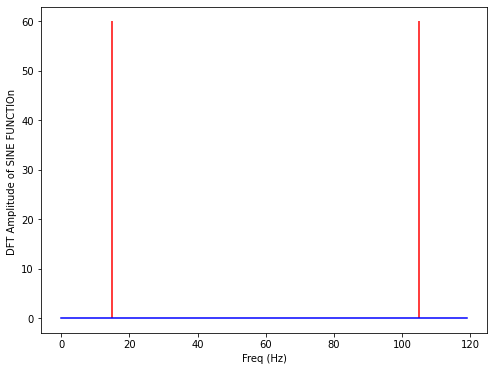

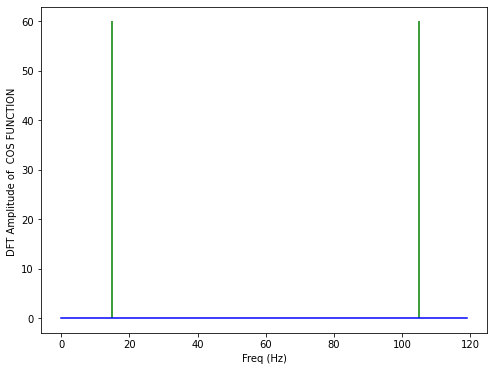

In [130]:
X1= DFT(sine[0:120])
X2= DFT(cos[0:120])


# calculate the frequency
N1 = len(X1)
n1 = np.arange(N1)
T1 = N1/sr
freq1 = n1/T1 

N2 = len(X2)
n2 = np.arange(N2)
T2= N2/sr
freq2 = n2/T1 

plt.figure(figsize = (8, 6))
plt.stem(freq1, abs(X1), 'r', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude of SINE FUNCTIOn ')
plt.show()

plt.figure(figsize = (8, 6))
plt.stem(freq2, abs(X2), 'g', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude of  COS FUNCTION ')
plt.show()

### Report your observations 
<br>
Sine Signal:  real and odd <br>
DFT is imaginary and odd. So the coeeficients are  60j and -60j.(odd function)<br>
Magnitude of the DFT coefficient= 60 for frequency bin 15 and 105 which is (120-15).<br>
<br>
Cos signal: real and even<br> 
DFT is real and even.So the Coefficients are 60 and 60 for both the frequency bins(15 and 105)<br>
Magnitude of the DFT coefficient= 60 for frequency bin 15 and 105 which is (120-15).<br>

<br>

#### Caveat
Both the magnitude plots look the same , so based on the sognal we need the analyse the coeficients.

### 2. On the same figure, plot the magnitude of the DFT of the first 130 samples of the signal.

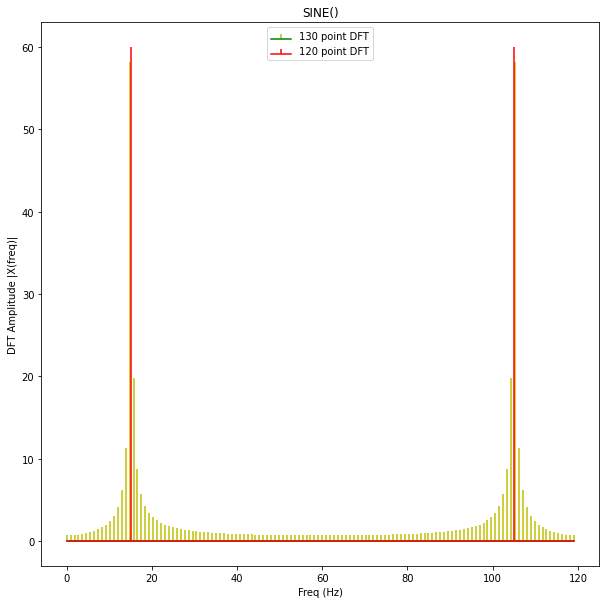

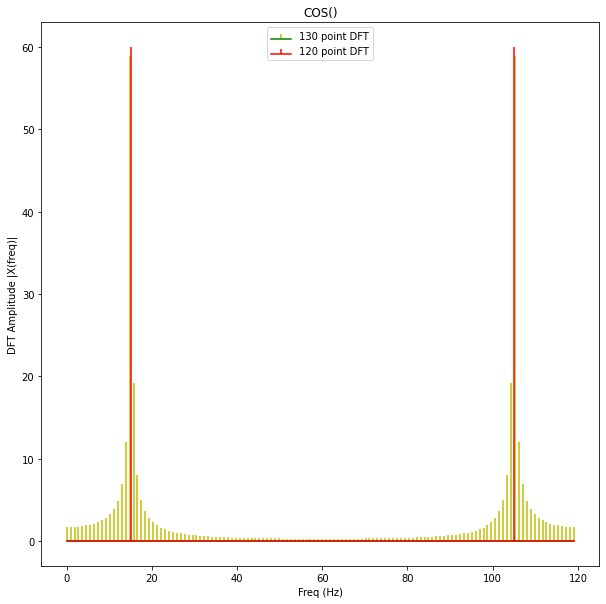

In [131]:
#sine wave 
X2 = DFT(sine[0:130])

# calculate the frequency
N2 = len(X2)
n2 = np.arange(N2)
T2 = N2/sr
freq2 = n2/T2 

fig, ax = plt.subplots(figsize=[10,10]) 
ax.stem(freq2, abs(X2), 'y',markerfmt=" ", basefmt="-g", label="130 point DFT")
ax.stem(freq1, abs(X1), 'r',markerfmt=" ", basefmt="-r", label="120 point DFT")
ax.set(title='SINE()', ylabel='DFT Amplitude |X(freq)|',xlabel='Freq (Hz)')
leg = ax.legend()

plt.show()

X2 = DFT(cos[0:130])

# calculate the frequency
N2 = len(X2)
n2 = np.arange(N2)
T2 = N2/sr
freq2 = n2/T2 

fig, ax = plt.subplots(figsize=[10,10]) 
ax.stem(freq2, abs(X2), 'y',markerfmt=" ", basefmt="-g", label="130 point DFT")
ax.stem(freq1, abs(X1), 'r',markerfmt=" ", basefmt="-r", label="120 point DFT")
ax.set(title='COS()', ylabel='DFT Amplitude |X(freq)|',xlabel='Freq (Hz)')
leg = ax.legend()

plt.show()

### Report your observations
Magnitude of fourier coefficient at 15 and 105 is less than 60. 
Spectral leakage observed 

Both the plots look the same.


### 3. Report N 6= 120 such that the DFT of the first N points of the signal matches with the DFT of the first 120 samples of the signal.

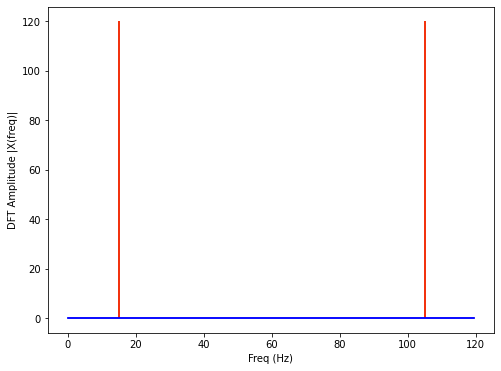

In [132]:
X3 = DFT(sine[0:240])

# calculate the frequency
N3 = len(X3)
n3 = np.arange(N3)
T3 = N3/sr
freq3 = n3/T3 

plt.figure(figsize = (8, 6))
plt.stem(freq3, abs(X3), 'y', \
         markerfmt=" ", basefmt="-b")
plt.stem(freq3, abs(X3), 'r', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


### Report your Observations
Multiples of 120 will produce plots that matches with the first 120.<br>
WHY? <br>
k/N = F/Fs<br>
k has to be an interger to avoid spectral leakage, F/Fs is fixed as frequency of the signal F is 15 and sampling rate Fs is 120, therefore , N (NO of samples in DFT) has to be a multiple of 120 for k to be an integer. 

***

## Problem 2. (Resolution of DFT)


### Generate a signal xa(t) = 0.1 sin(Bπt)+cos(Bπt) and sample it with a rate of 200 samples/secfor a duration of 10 seconds. Plot the DFT of the signal for<br> (i) 215 samples,<br> (ii) 415 samples,<br>(iii) 1115 samples <br>(iv) 1515 samples<br> (v) 1915 samples, in 5 separate figures. 

In [133]:
def plotting_func(X,sampling_rate):
  N = len(X)
  n = np.arange(N)
  T = N/sampling_rate
  freq = n/T 

  plt.figure(figsize = (10, 6))
  plt.stem(freq, abs(X), 'y',markerfmt=" ", basefmt="-b")

  plt.xlabel('Freq (Hz)')
  plt.ylabel('DFT Amplitude')
  plt.show()

In [134]:
A = 120
B = 126
sr2=200
time = np.arange(0,10,1/sr2)
sum=0.1*np.sin(A*np.pi*time)+np.cos(B*np.pi*time)


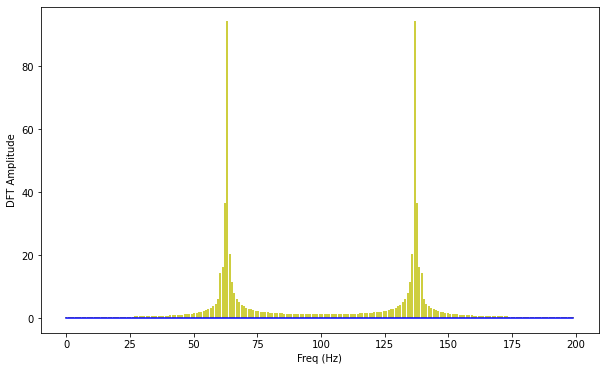

In [135]:
#215 Point DFT

sum_215=sum[0:215]
X_215 = DFT(sum_215)
plotting_func(X_215,sr2)


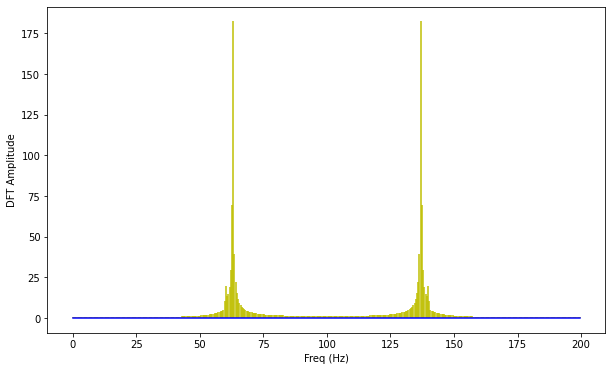

In [136]:
#415 Point DFT

sum_415=sum[0:415]
X_415 = DFT(sum_415)
plotting_func(X_415,sr2)

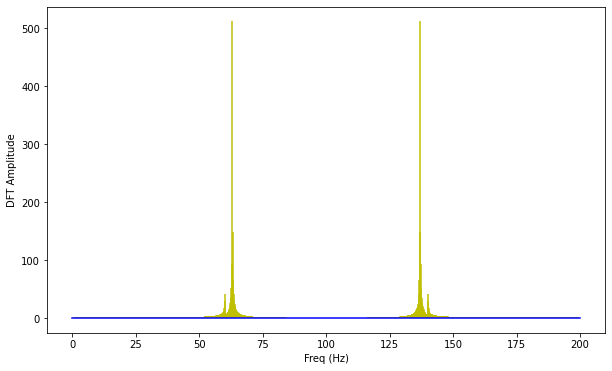

In [137]:
#1115 Point DFT

sum_1115=sum[0:1115]
X_1115 = DFT(sum_1115)
plotting_func(X_1115,sr2)

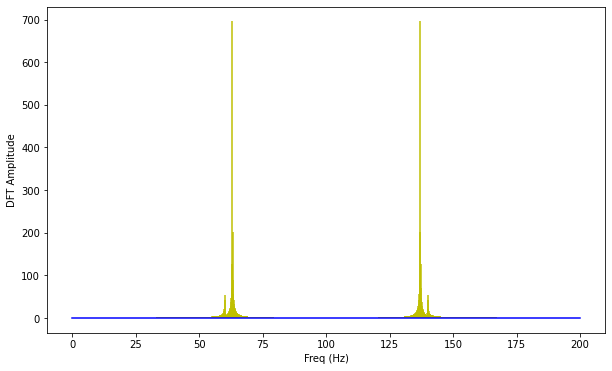

In [138]:
#1515 Point DFT

sum_1515=sum[0:1515]
X_1515 = DFT(sum_1515)
plotting_func(X_1515,sr2)

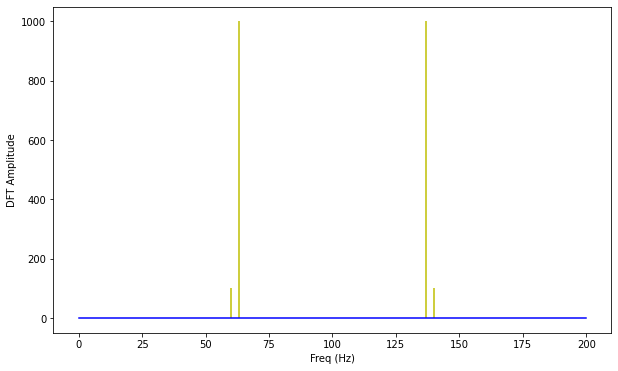

In [139]:
#1915 Point DFT

sum_1915=sum[0:2000]
X_1915 = DFT(sum_1915)
plotting_func(X_1915,sr2)


### Report your observations

- Amplitude of the coefficients increase with increase in the number of samples.<br>
X(k1)= - j* (No of samples)/2 * amplitude <br>
X(k2)= 1* (No of samples)/2 * amplitude <br>
X(k3)= j* (No of samples)/2 * amplitude <br>
X(k4)= 1* (No of samples)/2 * amplitude <br>
<br>
- Resolutiom increases with increase in the number of samples

Gets closer to the actual value, so better resolution and amplitude is sharper, not flat.

***

## Problem 3. (Resolution of DFT with windowing)

### Repeat Problem 2 by windowing the time-domain signal using: a Hamming window if α = 1, multiply the signal with the corresponding window of the same length, and then compute the DFT. Report your observations. Compare with the results obtained in Problem 2.

In [140]:
def window_hamming(N):
    from numpy import hamming
    return hamming(N) 

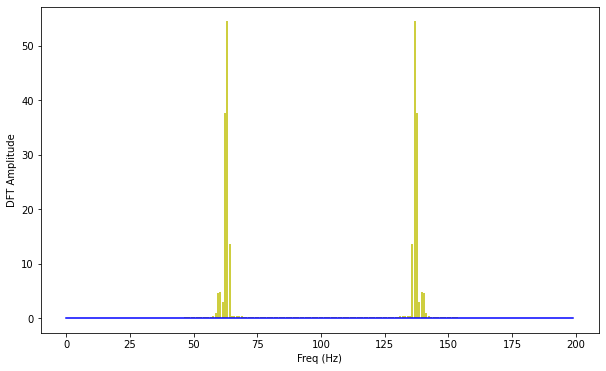

In [141]:
# 215 Point DFT
sum_windowed_215=np.multiply(window_hamming(len(sum[0:215])),sum[0:215])
X_215 = DFT(sum_windowed_215)
plotting_func(X_215,sr2)

### Report your Observations
When compared against signal that was not windowed.
Spectral leakage is eliminated.
But there is some loss of information in the peak,non-windowed siganl peaked steeply, close to magnitude of 80, while windowed function is peaking rather flatly with a magnitude close to 60.

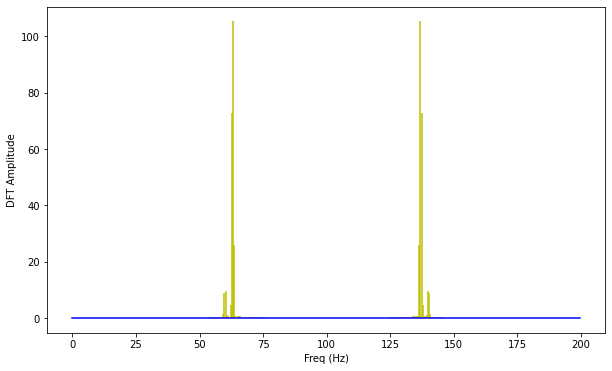

In [142]:
#415 Point DFT

sum_windowed_415=np.multiply(window_hamming(len(sum[0:415])),sum[0:415])
X_415 = DFT(sum_windowed_415)
plotting_func(X_415,sr2)

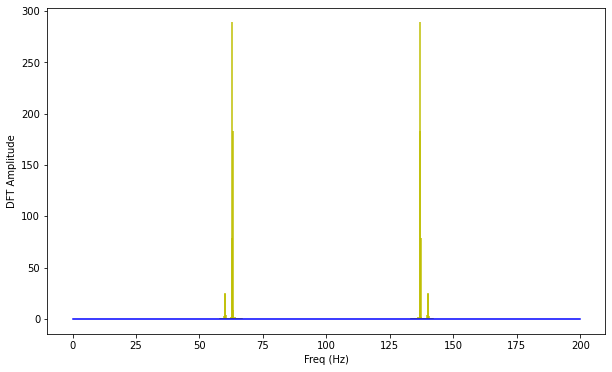

In [143]:
#1115 Point DFT

sum_windowed_1115=np.multiply(window_hamming(len(sum[0:1115])),sum[0:1115])
X_1115 = DFT(sum_windowed_1115)
plotting_func(X_1115,sr2)

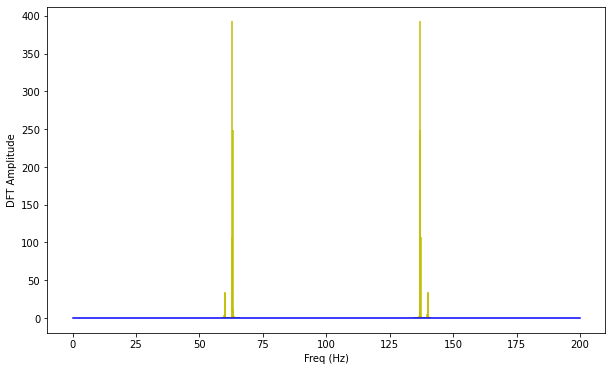

In [144]:
#1515 Point DFT

sum_windowed_1515=np.multiply(window_hamming(len(sum[0:1515])),sum[0:1515])
X_1515 = DFT(sum_windowed_1515)
plotting_func(X_1515,sr2)

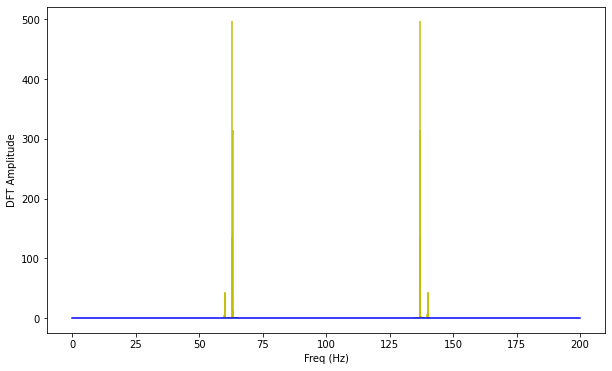

In [145]:
# 1915 Point DFT

sum_windowed_1915=np.multiply(window_hamming(len(sum[0:1915])),sum[0:1915])
X_1915 = DFT(sum_windowed_1915)
plotting_func(X_1915,sr2)

### Report you Observations
When compared against signals which are not windowed, spectral leakage is low (X(f)is mostly zero) , whist the resoution has considerably decreased (Flat top , lower magnitude).
SPectral smoothing observed!!


***

## Problem 4. (Frequency estimation using windowing)


### Estimation of the frequency components using time-domain windowing technique: Load thefile Exp4Dataα.txt. This has 500 samples of a dual tone. Express the values of frequency in terms of Fs (up to 3 decimal places).

1. Include time-domain windowing operation using Hamming window. Estimate the two
frequency components from these results. Help: It is a common practice to pad zeros
to improve the “interpolation” of the plot and take a higher-point DFT, say 10000
samples. This can be done by doing fft(x,10000) and normalizing the x-axis by
10000).

2. Repeat the above using a rectangular window.


In [146]:
x= np.loadtxt('Exp4Data1.txt', delimiter=',')

In [147]:
x.shape

(500,)

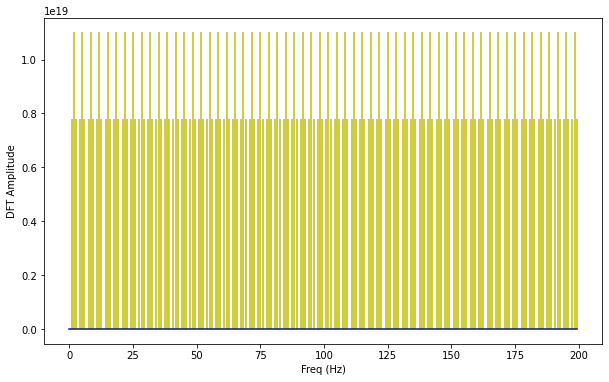

In [165]:
X = DFT(X)
plotting_func(X,sr2)


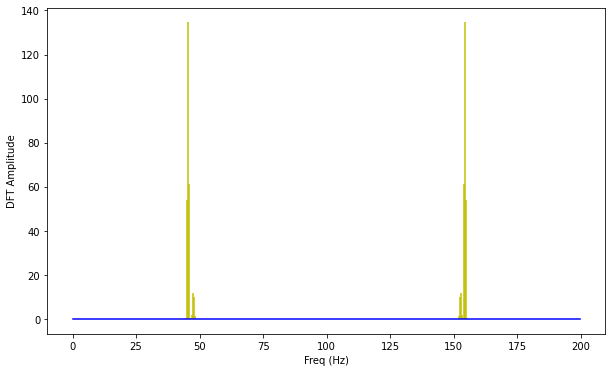

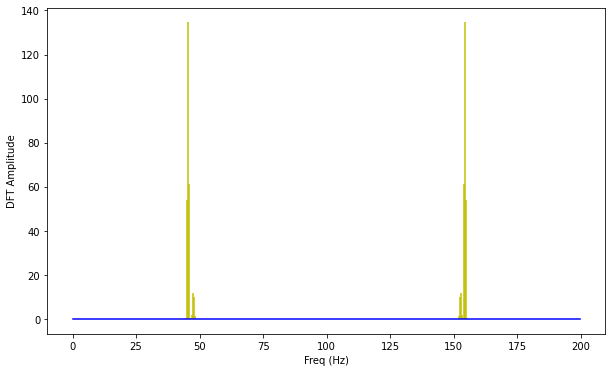

In [162]:

#Windowed  

#windowing for different lenghts 
X_windowed=np.multiply(window_hamming(len(x[0:10000])),x[0:10000])
Xw = DFT(X_windowed)
plotting_func(Xw,sr2)

X_windowed=np.multiply(window_hamming(len(x[0:500])),x[0:10000])
Xw = DFT(X_windowed)
plotting_func(Xw,sr2)



### Report your observations
Frequencies close to 50 Hz and 150 Hz.